In [1]:
#memanggil library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium

In [2]:
#memanggil dataframe yang akan dipakai
ispu = pd.read_excel("ISPU Jakarta.xlsx", sheet_name="Sheet1")

In [3]:
#mencetak 5 baris pertama 
ispu.head()

,Tanggal,PM10,PM25,SO2,CO,O3,NO2
0,2018-01-01,76.0,NaN,31.0,38.0,35.0,9.0
1,2018-01-02,23.0,NaN,31.0,24.0,39.0,14.0
2,2018-01-03,53.0,NaN,35.0,35.0,101.0,23.0
3,2018-01-04,53.0,NaN,49.0,34.0,57.0,15.0
4,2018-01-05,44.0,NaN,32.0,26.0,28.0,10.0


In [4]:
#menghitung persentase nilai yang hilang (missing values)
ispu.isna().sum()/len(ispu)*100

Tanggal     0.000000
PM10        0.332226
PM25       59.911406
SO2         0.885936
CO          0.332226
O3          0.110742
NO2         0.276855
dtype: float64

In [5]:
#menghapus variabel yang mengandung missing values lebih dari 30%
ispu2 = ispu.drop(['PM25'],axis = 1)

In [6]:
#menampilkan data setelah variabel PM25 dihapus
ispu2.head()

,Tanggal,PM10,SO2,CO,O3,NO2
0,2018-01-01,76.0,31.0,38.0,35.0,9.0
1,2018-01-02,23.0,31.0,24.0,39.0,14.0
2,2018-01-03,53.0,35.0,35.0,101.0,23.0
3,2018-01-04,53.0,49.0,34.0,57.0,15.0
4,2018-01-05,44.0,32.0,26.0,28.0,10.0


In [7]:
#mengisi missing values menggunakan metode forward fill ffill() dan backward fill bfill()
ispu2 = ispu2.ffill()
ispu2 = ispu2.bfill()

In [8]:
#menghitung persentase nilai yang hilang (missing values)
ispu2.isna().sum()/len(ispu2)*100

Tanggal    0.0
PM10       0.0
SO2        0.0
CO         0.0
O3         0.0
NO2        0.0
dtype: float64

In [9]:
#Menambahkan kolom Tahun, Bulan dan Hari pda data frame yang diekstraksi dari kolom Tanggal
ispu2['Tahun'] = pd.DatetimeIndex(ispu2['Tanggal']).year
ispu2['Bulan'] = pd.DatetimeIndex(ispu2['Tanggal']).month
ispu2['Hari'] = ispu2['Tanggal'].dt.day_name()

In [10]:
#Menamplkan 5 baris pertama dataframe
ispu2.head()

,Tanggal,PM10,SO2,CO,O3,NO2,Tahun,Bulan,Hari
0,2018-01-01,76.0,31.0,38.0,35.0,9.0,2018,1,Monday
1,2018-01-02,23.0,31.0,24.0,39.0,14.0,2018,1,Tuesday
2,2018-01-03,53.0,35.0,35.0,101.0,23.0,2018,1,Wednesday
3,2018-01-04,53.0,49.0,34.0,57.0,15.0,2018,1,Thursday
4,2018-01-05,44.0,32.0,26.0,28.0,10.0,2018,1,Friday


In [11]:
#menghapus data dan menambahkan kolom baru yang dihasilkan dari kolom tanggal
ispu4 = ispu
ispu4 = ispu.dropna()
ispu4['Tahun'] = pd.DatetimeIndex(ispu4['Tanggal']).year
ispu4['Bulan'] = pd.DatetimeIndex(ispu4['Tanggal']).month
ispu4['Hari'] = ispu4['Tanggal'].dt.day_name()
ispu4.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_13528\2665653596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ispu4['Tahun'] = pd.DatetimeIndex(ispu4['Tanggal']).year
C:\Users\USER\AppData\Local\Temp\ipykernel_13528\2665653596.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ispu4['Bulan'] = pd.DatetimeIndex(ispu4['Tanggal']).month
C:\Users\USER\AppData\Local\Temp\ipykernel_13528\2665653596.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,Tanggal,PM10,PM25,SO2,CO,O3,NO2,Tahun,Bulan,Hari
1076,2021-01-01,38.0,53.0,29.0,6.0,31.0,13.0,2021,1,Friday
1077,2021-01-02,27.0,46.0,27.0,7.0,47.0,7.0,2021,1,Saturday
1078,2021-01-03,44.0,58.0,25.0,7.0,40.0,13.0,2021,1,Sunday
1079,2021-01-04,30.0,48.0,24.0,4.0,32.0,7.0,2021,1,Monday
1080,2021-01-05,38.0,53.0,24.0,6.0,31.0,9.0,2021,1,Tuesday


In [12]:
#menampilkan 5 data teratas
ispu4.head()

,Tanggal,PM10,PM25,SO2,CO,O3,NO2,Tahun,Bulan,Hari
1076,2021-01-01,38.0,53.0,29.0,6.0,31.0,13.0,2021,1,Friday
1077,2021-01-02,27.0,46.0,27.0,7.0,47.0,7.0,2021,1,Saturday
1078,2021-01-03,44.0,58.0,25.0,7.0,40.0,13.0,2021,1,Sunday
1079,2021-01-04,30.0,48.0,24.0,4.0,32.0,7.0,2021,1,Monday
1080,2021-01-05,38.0,53.0,24.0,6.0,31.0,9.0,2021,1,Tuesday


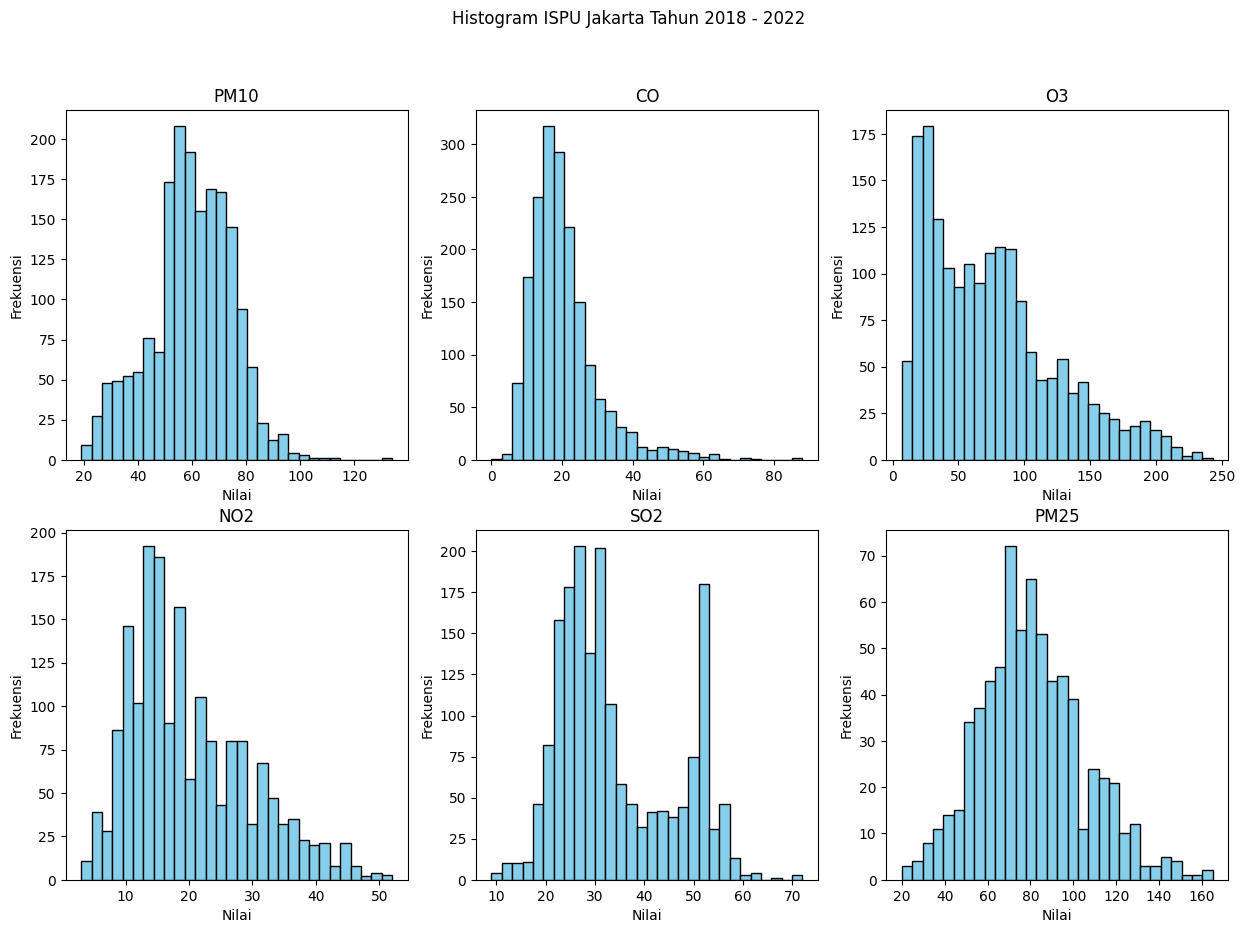

In [13]:
#membuat enam histogram untuk berbagai polutan udara di Jakarta dari tahun 2018 hingga 2022 menggunakan matplotlib
fig = plt.subplots(2,3,figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(ispu2['PM10'],bins=30,color='skyblue',edgecolor='black')
plt.title('PM10')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')


plt.subplot(2,3,2)
plt.hist(ispu2['CO'],bins=30,color='skyblue',edgecolor='black')
plt.title('CO')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')


plt.subplot(2,3,3)
plt.hist(ispu2['O3'],bins=30,color='skyblue',edgecolor='black')
plt.title('O3')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2,3,4)
plt.hist(ispu2['NO2'],bins=30,color='skyblue',edgecolor='black')
plt.title('NO2')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2,3,5)
plt.hist(ispu2['SO2'],bins=30,color='skyblue',edgecolor='black')
plt.title('SO2')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2,3,6)
plt.hist(ispu4['PM25'],bins=30,color='skyblue',edgecolor='black')
plt.title('PM25')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.suptitle("Histogram ISPU Jakarta Tahun 2018 - 2022")
plt.show()

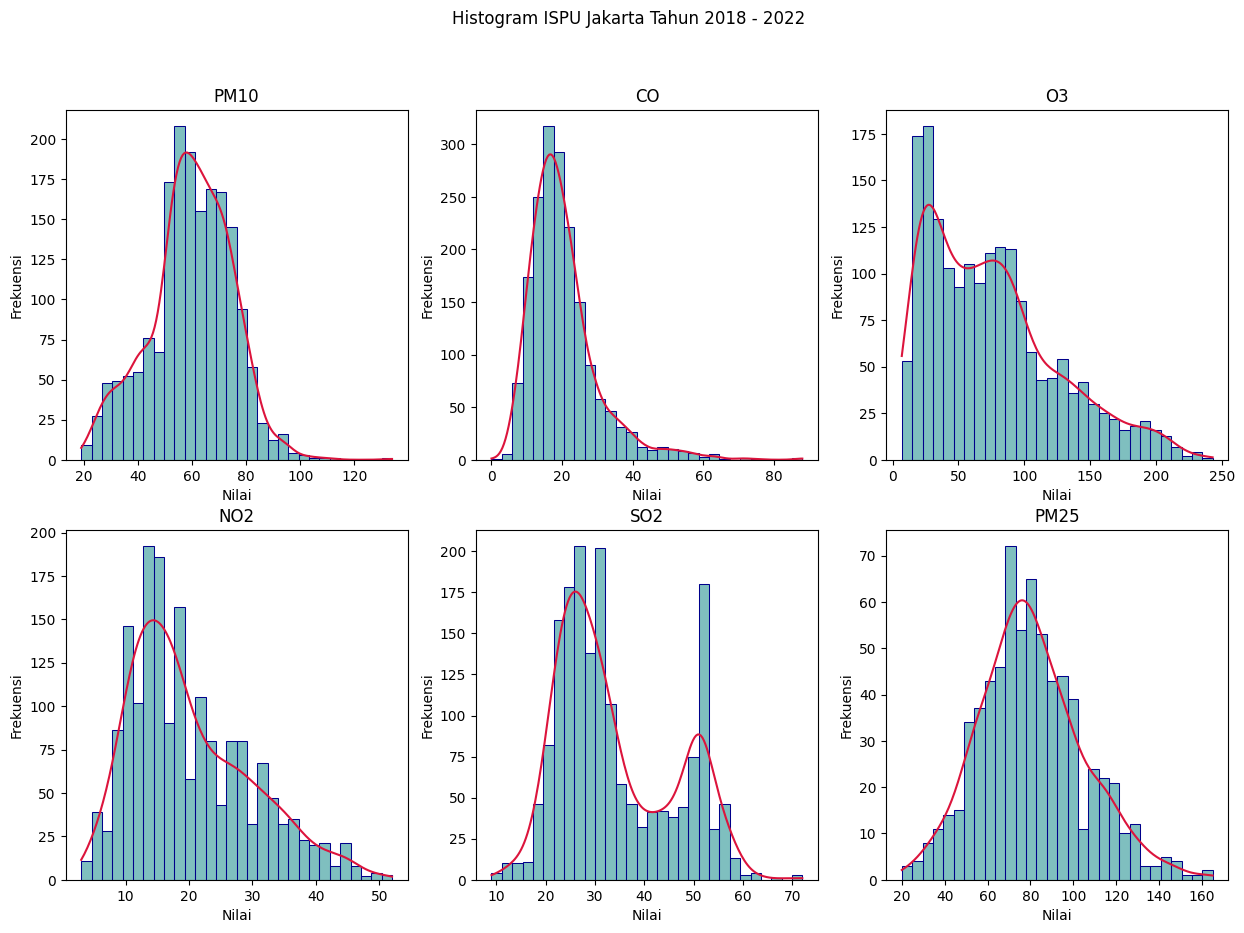

In [14]:
#membuat enam histogram untuk berbagai polutan udara di Jakarta dari tahun 2018 hingga 2022 menggunakan seaborn dan matplotlib
fig = plt.subplots(2,3,figsize=(15,10))
plt.subplot(2,3,1)
ax = sns.histplot(ispu2['PM10'],bins=30,kde=True,color='teal',edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('PM10')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2,3,2)
ax = sns.histplot(ispu2['CO'],bins=30,kde=True,color='teal',edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('CO')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2,3,3)
ax = sns.histplot(ispu2['O3'],bins=30,kde=True,color='teal',edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('O3')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2,3,4)
ax = sns.histplot(ispu2['NO2'],bins=30,kde=True,color='teal',edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('NO2')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2,3,5)
ax = sns.histplot(ispu2['SO2'],bins=30,kde=True,color='teal',edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('SO2')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2,3,6)
ax = sns.histplot(ispu4['PM25'],bins=30,kde=True,color='teal',edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('PM25')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.suptitle("Histogram ISPU Jakarta Tahun 2018 - 2022")
plt.show()

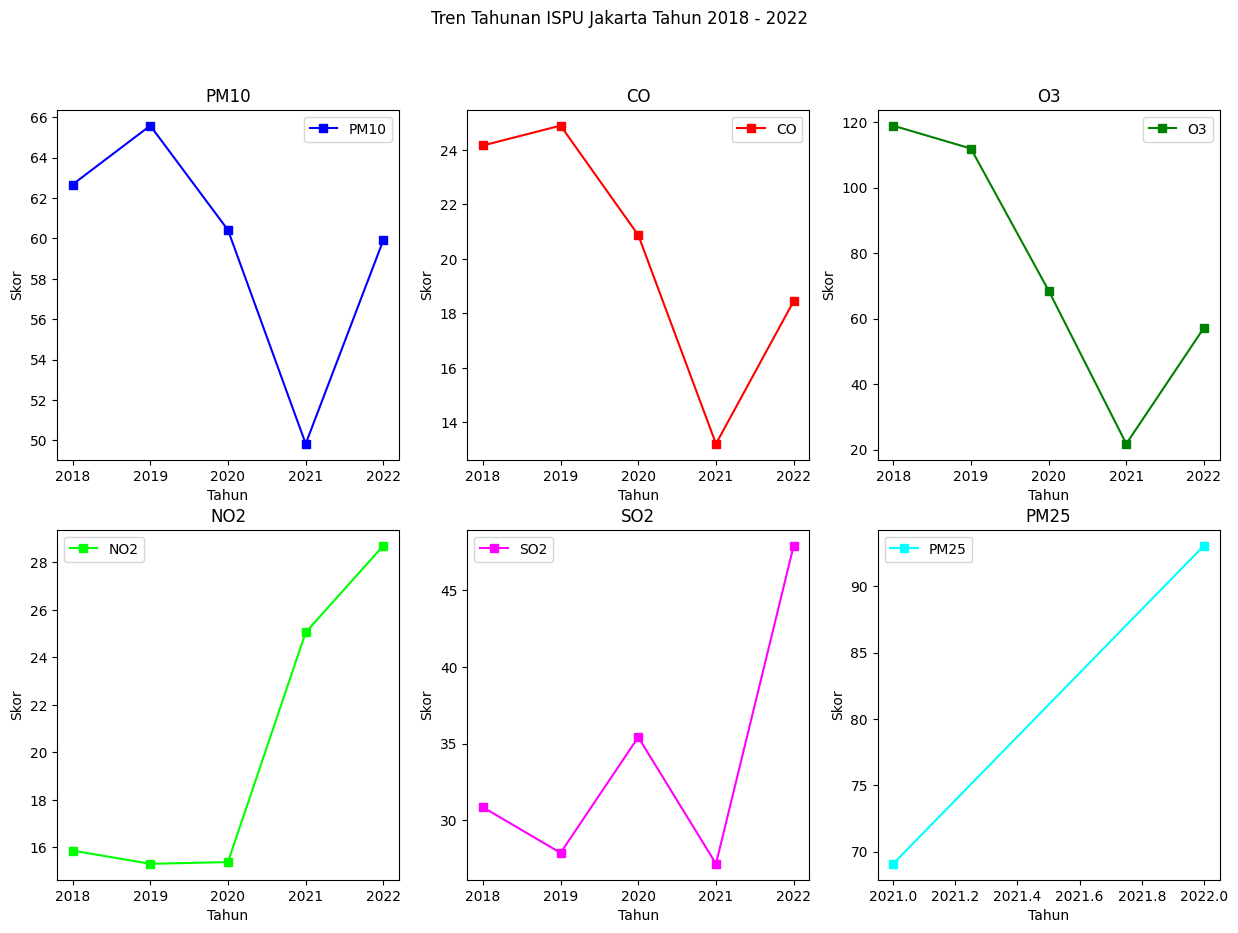

In [15]:
#membuat enam subplot yang menunjukkan tren tahunan rata-rata skor ISPU untuk berbagai polutan udara di Jakarta dari tahun 2018 hingga 2022 menggunakan matplotlib
fig = plt.subplots(2,3,figsize=(15,10))
plt.subplot(2,3,1)
ispu2.groupby('Tahun')['PM10'].mean().plot(marker = 's', legend = True, color = 'blue')
plt.title('PM10')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,2)
ispu2.groupby('Tahun')['CO'].mean().plot(marker = 's', legend = True, color = 'red')
plt.title('CO')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,3)
ispu2.groupby('Tahun')['O3'].mean().plot(marker = 's', legend = True, color = 'green')
plt.title('O3')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,4)
ispu2.groupby('Tahun')['NO2'].mean().plot(marker = 's', legend = True, color = 'lime')
plt.title('NO2')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,5)
ispu2.groupby('Tahun')['SO2'].mean().plot(marker = 's', legend = True, color = 'magenta')
plt.title('SO2')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,6)
ispu4.groupby('Tahun')['PM25'].mean().plot(marker = 's', legend = True, color = 'aqua')
plt.title('PM25')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.suptitle('Tren Tahunan ISPU Jakarta Tahun 2018 - 2022')
plt.show()

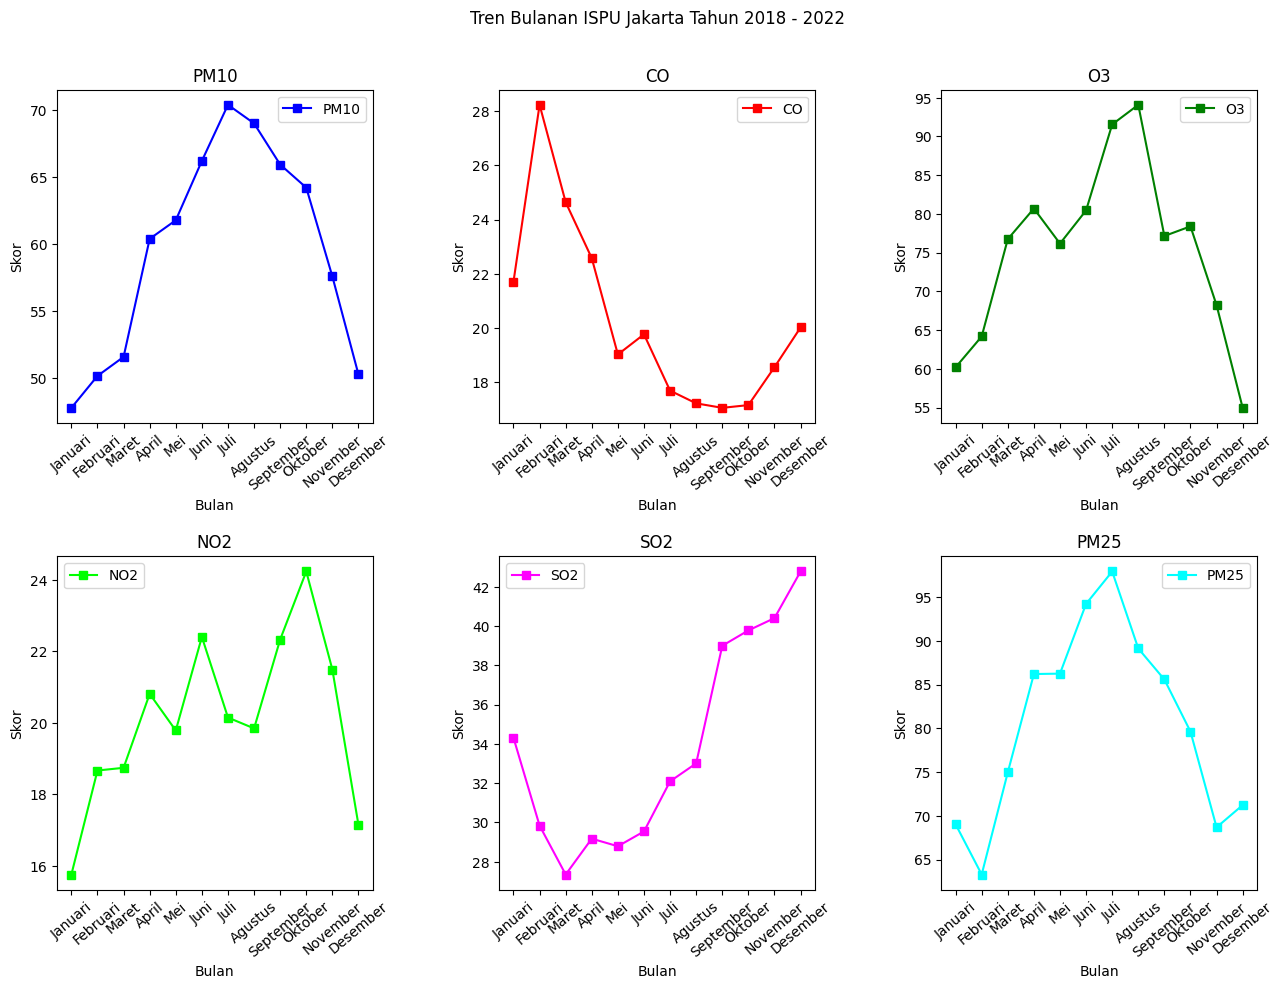

In [16]:
#membuat enam subplot yang menunjukkan tren bulanan rata-rata skor ISPU untuk berbagai polutan udara di Jakarta dari tahun 2018 hingga 2022 menggunakan matplotlib 
fig = plt.subplots(2,3,figsize=(15,10))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
plt.subplot(2,3,1)
ispu2.groupby('Bulan')['PM10'].mean().plot(marker = 's', legend = True, color = 'blue')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember'],rotation=40)
plt.title('PM10')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2,3,2)
ispu2.groupby('Bulan')['CO'].mean().plot(marker = 's', legend = True, color = 'red')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember'],rotation=40)
plt.title('CO')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2,3,3)
ispu2.groupby('Bulan')['O3'].mean().plot(marker = 's', legend = True, color = 'green')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember'],rotation=40)
plt.title('O3')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2,3,4)
ispu2.groupby('Bulan')['NO2'].mean().plot(marker = 's', legend = True, color = 'lime')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember'],rotation=40)
plt.title('NO2')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2,3,5)
ispu2.groupby('Bulan')['SO2'].mean().plot(marker = 's', legend = True, color = 'magenta')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember'],rotation=40)
plt.title('SO2')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2,3,6)
ispu4.groupby('Bulan')['PM25'].mean().plot(marker = 's', legend = True, color = 'aqua')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember'],rotation=40)
plt.title('PM25')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.suptitle("Tren Bulanan ISPU Jakarta Tahun 2018 - 2022")
plt.show()

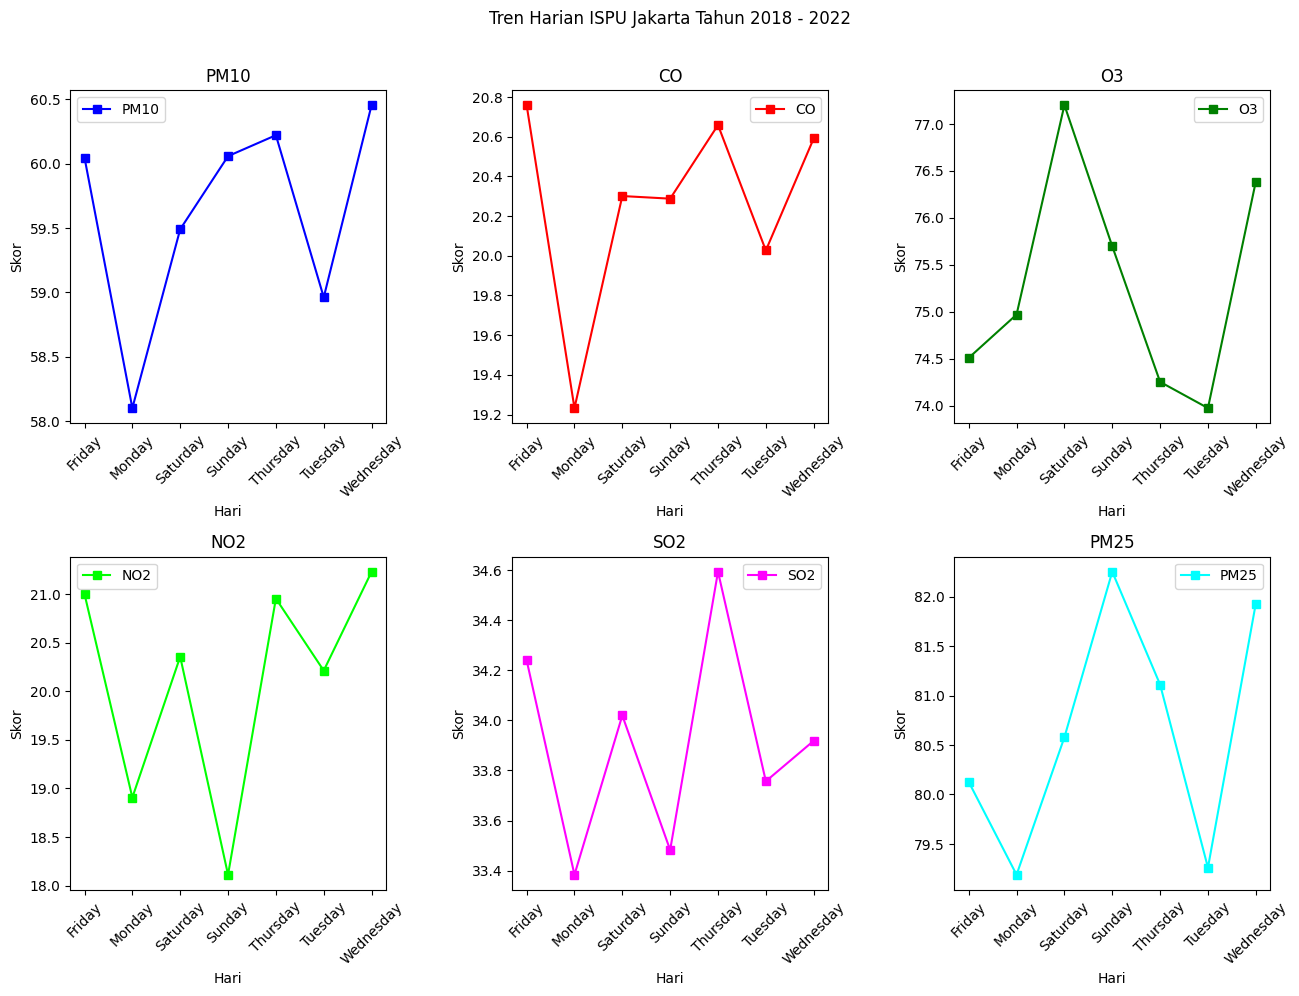

In [17]:
#membuat enam subplot yang menunjukkan tren harian rata-rata skor ISPU untuk berbagai polutan udara di Jakarta dari tahun 2018 hingga 2022 menggunakan matplotlib
fig = plt.subplots(2,3,figsize=(15,10))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
plt.subplot(2,3,1)
ispu2.groupby('Hari')['PM10'].mean().plot(marker = 's', legend = True, color = 'blue')
plt.xticks(rotation=45)
plt.title('PM10')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,2)
ispu2.groupby('Hari')['CO'].mean().plot(marker = 's', legend = True, color = 'red')
plt.xticks(rotation=45)
plt.title('CO')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,3)
ispu2.groupby('Hari')['O3'].mean().plot(marker = 's', legend = True, color = 'green')
plt.xticks(rotation=45)
plt.title('O3')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,4)
ispu2.groupby('Hari')['NO2'].mean().plot(marker = 's', legend = True, color = 'lime')
plt.xticks(rotation=45)
plt.title('NO2')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,5)
ispu2.groupby('Hari')['SO2'].mean().plot(marker = 's', legend = True, color = 'magenta')
plt.xticks(rotation=45)
plt.title('SO2')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,6)
ispu4.groupby('Hari')['PM25'].mean().plot(marker = 's', legend = True, color = 'aqua')
plt.xticks(rotation=45)
plt.title('PM25')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.suptitle("Tren Harian ISPU Jakarta Tahun 2018 - 2022")
plt.show()

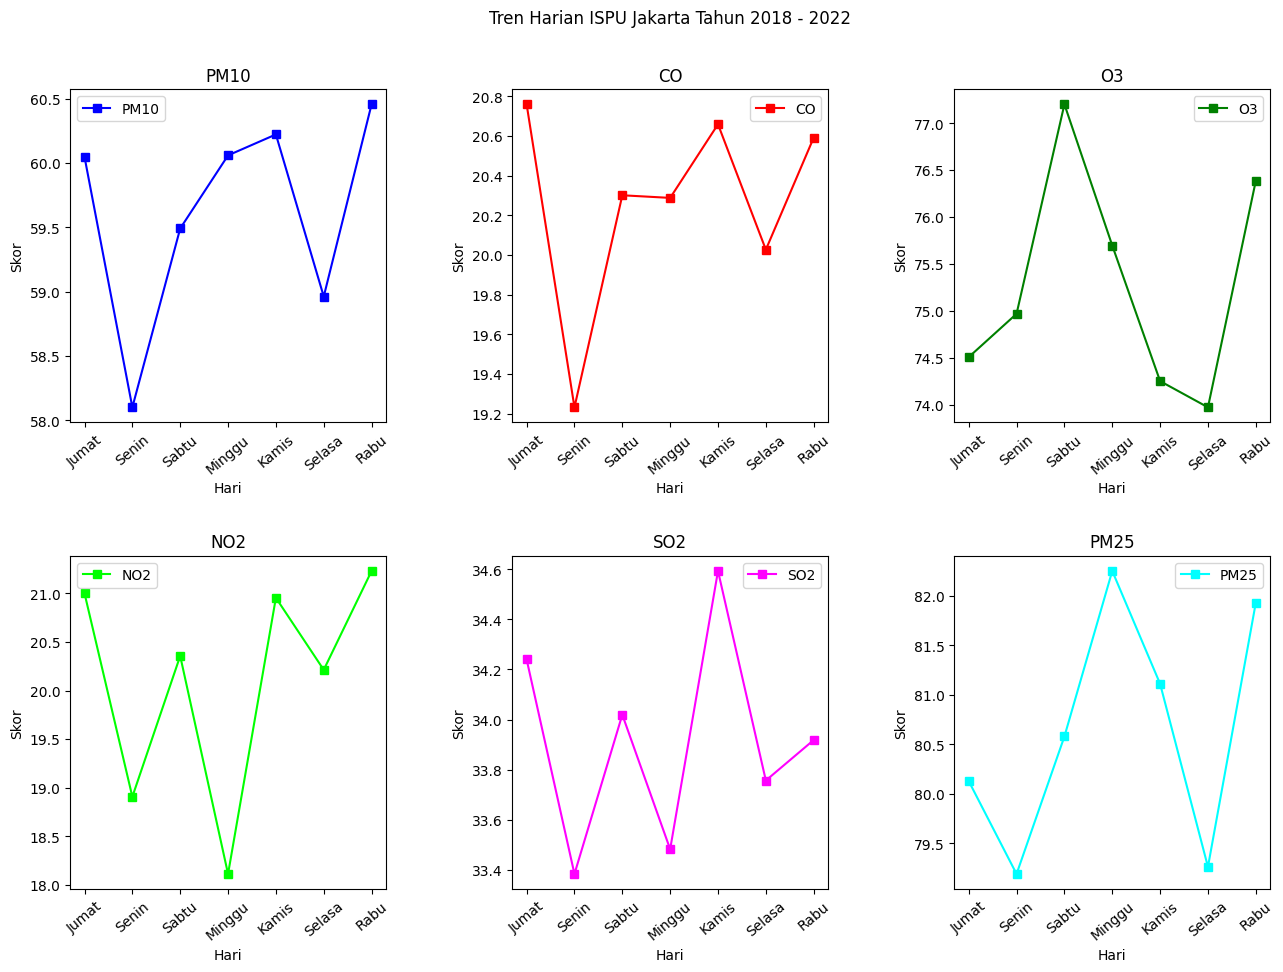

In [18]:
#menghasilkan enam garis plot yang menampilkan tren harian rata-rata skor ISPU untuk berbagai polutan udara di Jakarta dari tahun 2018 hingga 2022
fig = plt.subplots(2,3,figsize=(15,10))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
plt.subplot(2,3,1)
ispu2.groupby('Hari')['PM10'].mean().plot(marker = 's', legend = True, color = 'blue')
plt.xticks([0,1,2,3,4,5,6],['Jumat','Senin','Sabtu','Minggu','Kamis','Selasa','Rabu'],rotation=40)
plt.title('PM10')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,2)
ispu2.groupby('Hari')['CO'].mean().plot(marker = 's', legend = True, color = 'red')
plt.xticks([0,1,2,3,4,5,6],['Jumat','Senin','Sabtu','Minggu','Kamis','Selasa','Rabu'],rotation=40)
plt.title('CO')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,3)
ispu2.groupby('Hari')['O3'].mean().plot(marker = 's', legend = True, color = 'green')
plt.xticks([0,1,2,3,4,5,6],['Jumat','Senin','Sabtu','Minggu','Kamis','Selasa','Rabu'],rotation=40)
plt.title('O3')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,4)
ispu2.groupby('Hari')['NO2'].mean().plot(marker = 's', legend = True, color = 'lime')
plt.xticks([0,1,2,3,4,5,6],['Jumat','Senin','Sabtu','Minggu','Kamis','Selasa','Rabu'],rotation=40)
plt.title('NO2')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,5)
ispu2.groupby('Hari')['SO2'].mean().plot(marker = 's', legend = True, color = 'magenta')
plt.xticks([0,1,2,3,4,5,6],['Jumat','Senin','Sabtu','Minggu','Kamis','Selasa','Rabu'],rotation=40)
plt.title('SO2')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,6)
ispu4.groupby('Hari')['PM25'].mean().plot(marker = 's', legend = True, color = 'aqua')
plt.xticks([0,1,2,3,4,5,6],['Jumat','Senin','Sabtu','Minggu','Kamis','Selasa','Rabu'],rotation=40)
plt.title('PM25')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.suptitle("Tren Harian ISPU Jakarta Tahun 2018 - 2022")
plt.show()

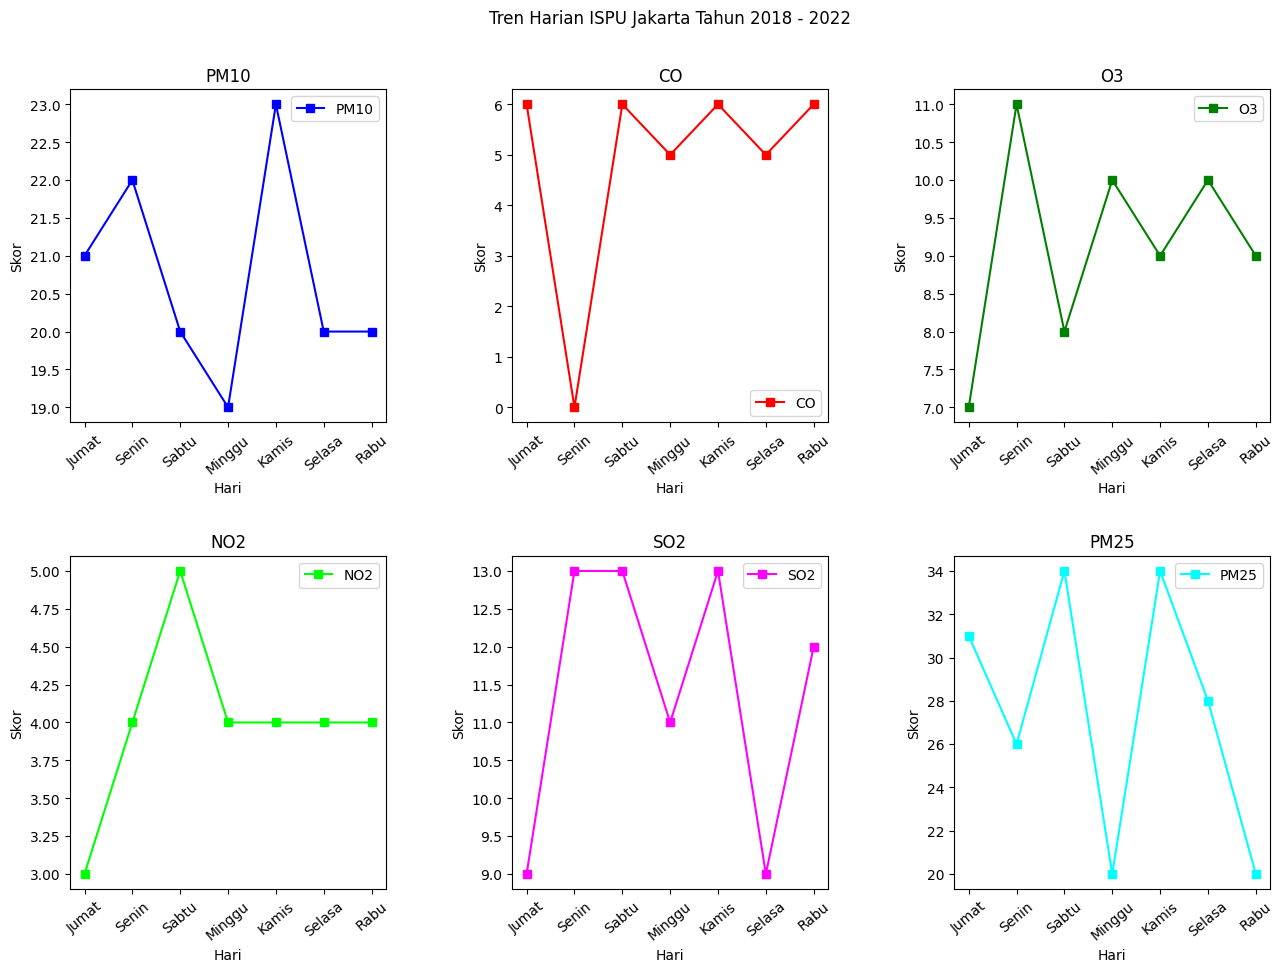

In [19]:
#membuat enam subplot yang menampilkan tren nilai minimum harian ISPU untuk berbagai polutan udara di Jakarta dari tahun 2018 hingga 2022
fig = plt.subplots(2,3,figsize=(15,10))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
plt.subplot(2,3,1)
ispu2.groupby('Hari')['PM10'].min().plot(marker = 's', legend = True, color = 'blue')
plt.xticks([0,1,2,3,4,5,6],['Jumat','Senin','Sabtu','Minggu','Kamis','Selasa','Rabu'],rotation=40)
plt.title('PM10')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,2)
ispu2.groupby('Hari')['CO'].min().plot(marker = 's', legend = True, color = 'red')
plt.xticks([0,1,2,3,4,5,6],['Jumat','Senin','Sabtu','Minggu','Kamis','Selasa','Rabu'],rotation=40)
plt.title('CO')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,3)
ispu2.groupby('Hari')['O3'].min().plot(marker = 's', legend = True, color = 'green')
plt.xticks([0,1,2,3,4,5,6],['Jumat','Senin','Sabtu','Minggu','Kamis','Selasa','Rabu'],rotation=40)
plt.title('O3')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,4)
ispu2.groupby('Hari')['NO2'].min().plot(marker = 's', legend = True, color = 'lime')
plt.xticks([0,1,2,3,4,5,6],['Jumat','Senin','Sabtu','Minggu','Kamis','Selasa','Rabu'],rotation=40)
plt.title('NO2')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,5)
ispu2.groupby('Hari')['SO2'].min().plot(marker = 's', legend = True, color = 'magenta')
plt.xticks([0,1,2,3,4,5,6],['Jumat','Senin','Sabtu','Minggu','Kamis','Selasa','Rabu'],rotation=40)
plt.title('SO2')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,6)
ispu4.groupby('Hari')['PM25'].min().plot(marker = 's', legend = True, color = 'aqua')
plt.xticks([0,1,2,3,4,5,6],['Jumat','Senin','Sabtu','Minggu','Kamis','Selasa','Rabu'],rotation=40)
plt.title('PM25')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.suptitle("Tren Harian ISPU Jakarta Tahun 2018 - 2022")
plt.show()

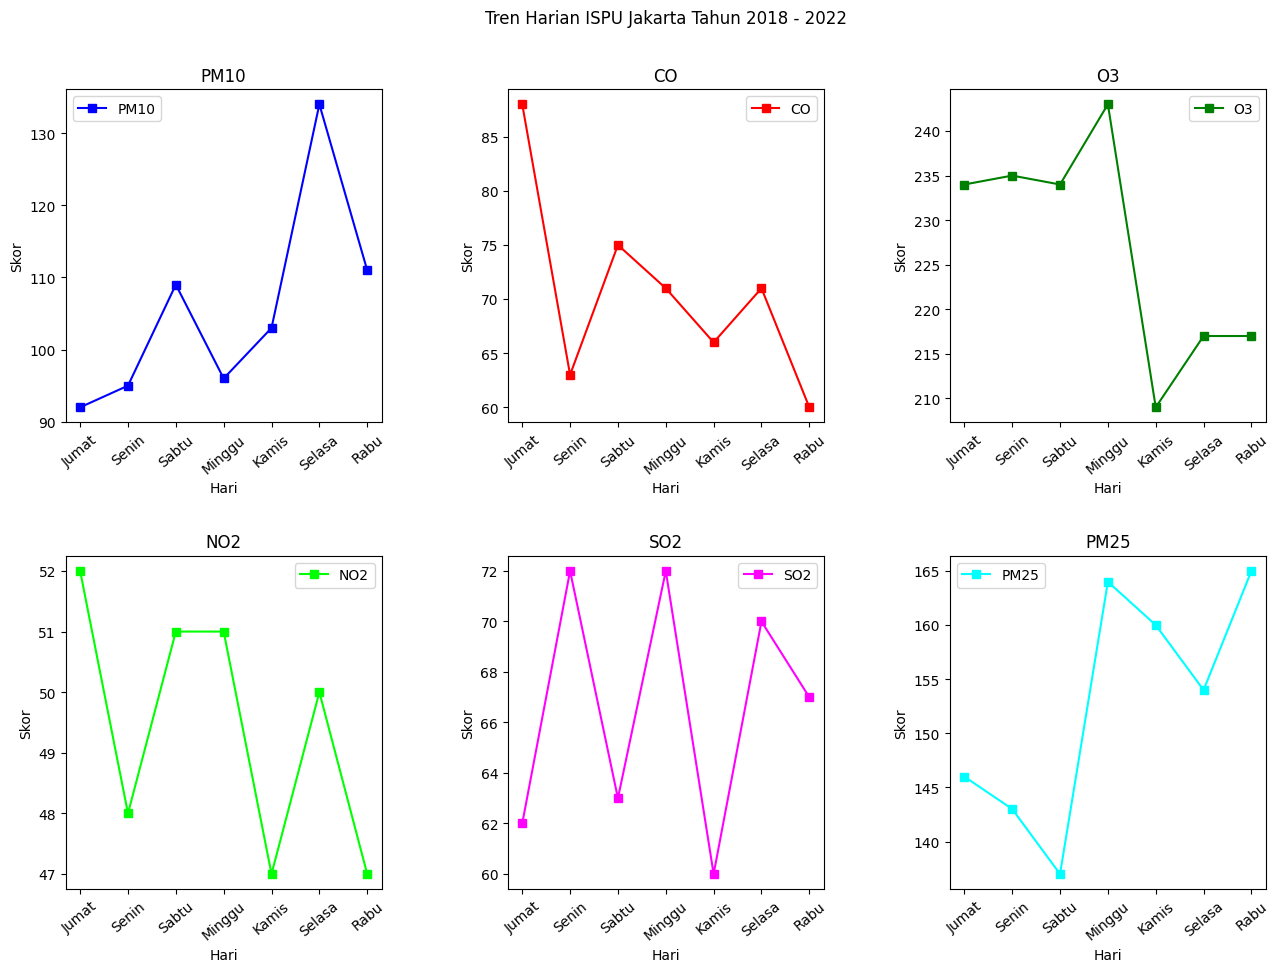

In [20]:
#membuat enam subplot yang menampilkan tren nilai maksimum harian ISPU untuk berbagai polutan udara di Jakarta dari tahun 2018 hingga 2022
fig = plt.subplots(2,3,figsize=(15,10))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
plt.subplot(2,3,1)
ispu2.groupby('Hari')['PM10'].max().plot(marker = 's', legend = True, color = 'blue')
plt.xticks([0,1,2,3,4,5,6],['Jumat','Senin','Sabtu','Minggu','Kamis','Selasa','Rabu'],rotation=40)
plt.title('PM10')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,2)
ispu2.groupby('Hari')['CO'].max().plot(marker = 's', legend = True, color = 'red')
plt.xticks([0,1,2,3,4,5,6],['Jumat','Senin','Sabtu','Minggu','Kamis','Selasa','Rabu'],rotation=40)
plt.title('CO')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,3)
ispu2.groupby('Hari')['O3'].max().plot(marker = 's', legend = True, color = 'green')
plt.xticks([0,1,2,3,4,5,6],['Jumat','Senin','Sabtu','Minggu','Kamis','Selasa','Rabu'],rotation=40)
plt.title('O3')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,4)
ispu2.groupby('Hari')['NO2'].max().plot(marker = 's', legend = True, color = 'lime')
plt.xticks([0,1,2,3,4,5,6],['Jumat','Senin','Sabtu','Minggu','Kamis','Selasa','Rabu'],rotation=40)
plt.title('NO2')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,5)
ispu2.groupby('Hari')['SO2'].max().plot(marker = 's', legend = True, color = 'magenta')
plt.xticks([0,1,2,3,4,5,6],['Jumat','Senin','Sabtu','Minggu','Kamis','Selasa','Rabu'],rotation=40)
plt.title('SO2')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,6)
ispu4.groupby('Hari')['PM25'].max().plot(marker = 's', legend = True, color = 'aqua')
plt.xticks([0,1,2,3,4,5,6],['Jumat','Senin','Sabtu','Minggu','Kamis','Selasa','Rabu'],rotation=40)
plt.title('PM25')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.suptitle("Tren Harian ISPU Jakarta Tahun 2018 - 2022")
plt.show()

# Analisis Data Udara di Jakarta Polutan PM10
![Screenshot 2024-05-27 213946.png](<attachment:Screenshot 2024-05-27 213946.png>)


## Analisis Polutan
Rata-rata terendah variabel PM10 terjadi
pada hari Jumat, sedangkan nilai rata –
rata tertinggi pada hari Selasa.



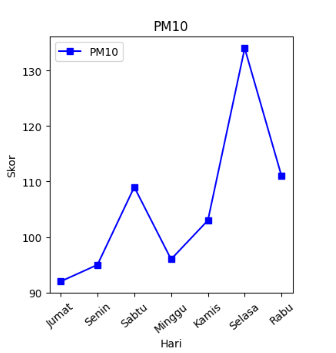

# Analisis Data Udara di Jakarta Polutan CO
![Screenshot 2024-05-27 215412.png](<attachment:Screenshot 2024-05-27 215412.png>)


## Analisis Polutan
Rata-rata terendah variabel CO terjadi
pada hari Rabu, sedangkan nilai rata –
rata tertinggi pada hari Jumat.
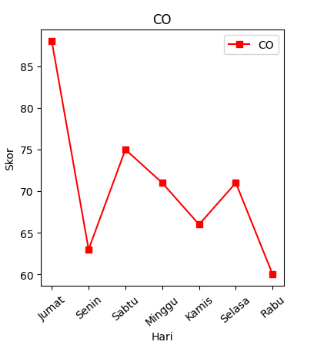

# Analisis Data Udara di Jakarta Polutan O3
![Screenshot 2024-05-27 215424.png](<attachment:Screenshot 2024-05-27 215424.png>)


## Analisis Polutan
Rata-rata terendah variabel O3 terjadi
pada hari Kamis, sedangkan nilai rata –
rata tertinggi pada hari Minggu.
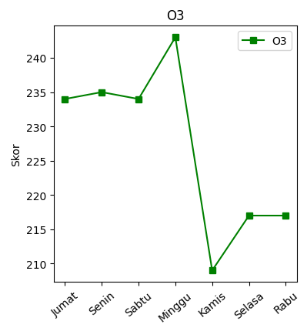

# Analisis Data Udara di Jakarta Polutan NO2
![Screenshot 2024-05-27 215437.png](<attachment:Screenshot 2024-05-27 215437.png>)


## Analisis Polutan
Rata-rata terendah variabel NO2 terjadi
pada hari Kamis dan Rabu, sedangkan nilai rata –
rata tertinggi pada hari Jumat.
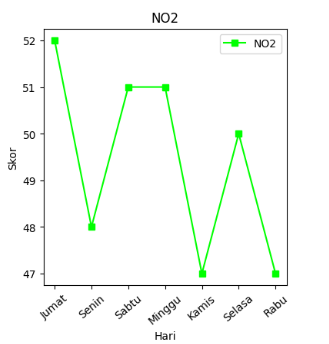

# Analisis Data Udara di Jakarta Polutan SO2
![Screenshot 2024-05-27 215446.png](<attachment:Screenshot 2024-05-27 215446.png>)


## Analisis Polutan
Rata-rata terendah variabel SO2 terjadi
pada hari Kamis, sedangkan nilai rata –
rata tertinggi pada hari Senin dan Minggu.
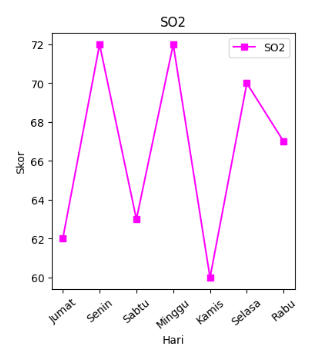

# Analisis Data Udara di Jakarta Polutan PM25
![Screenshot 2024-05-27 215454.png](<attachment:Screenshot 2024-05-27 215454.png>)


## Analisis Polutan
Rata-rata terendah variabel PM25 terjadi
pada hari Sabtu, sedangkan nilai rata –
rata tertinggi pada hari Rabu.
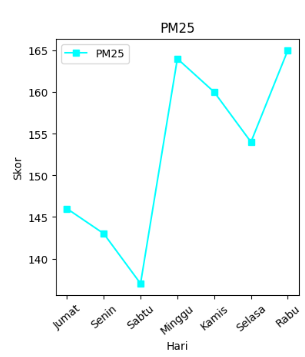